In [1]:
import pandas as pd
import os
from Bonds import Bonds
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir = "data/final"
data = {}
for root, dirs, files in os.walk(data_dir):
    if files:
        for file in files:
            df = pd.read_csv(os.path.join(root, file))
            start_date = pd.to_datetime(file.split('.')[0], format="mixed")
            bonds = Bonds(df, start_date)
            data[start_date] = bonds

[]

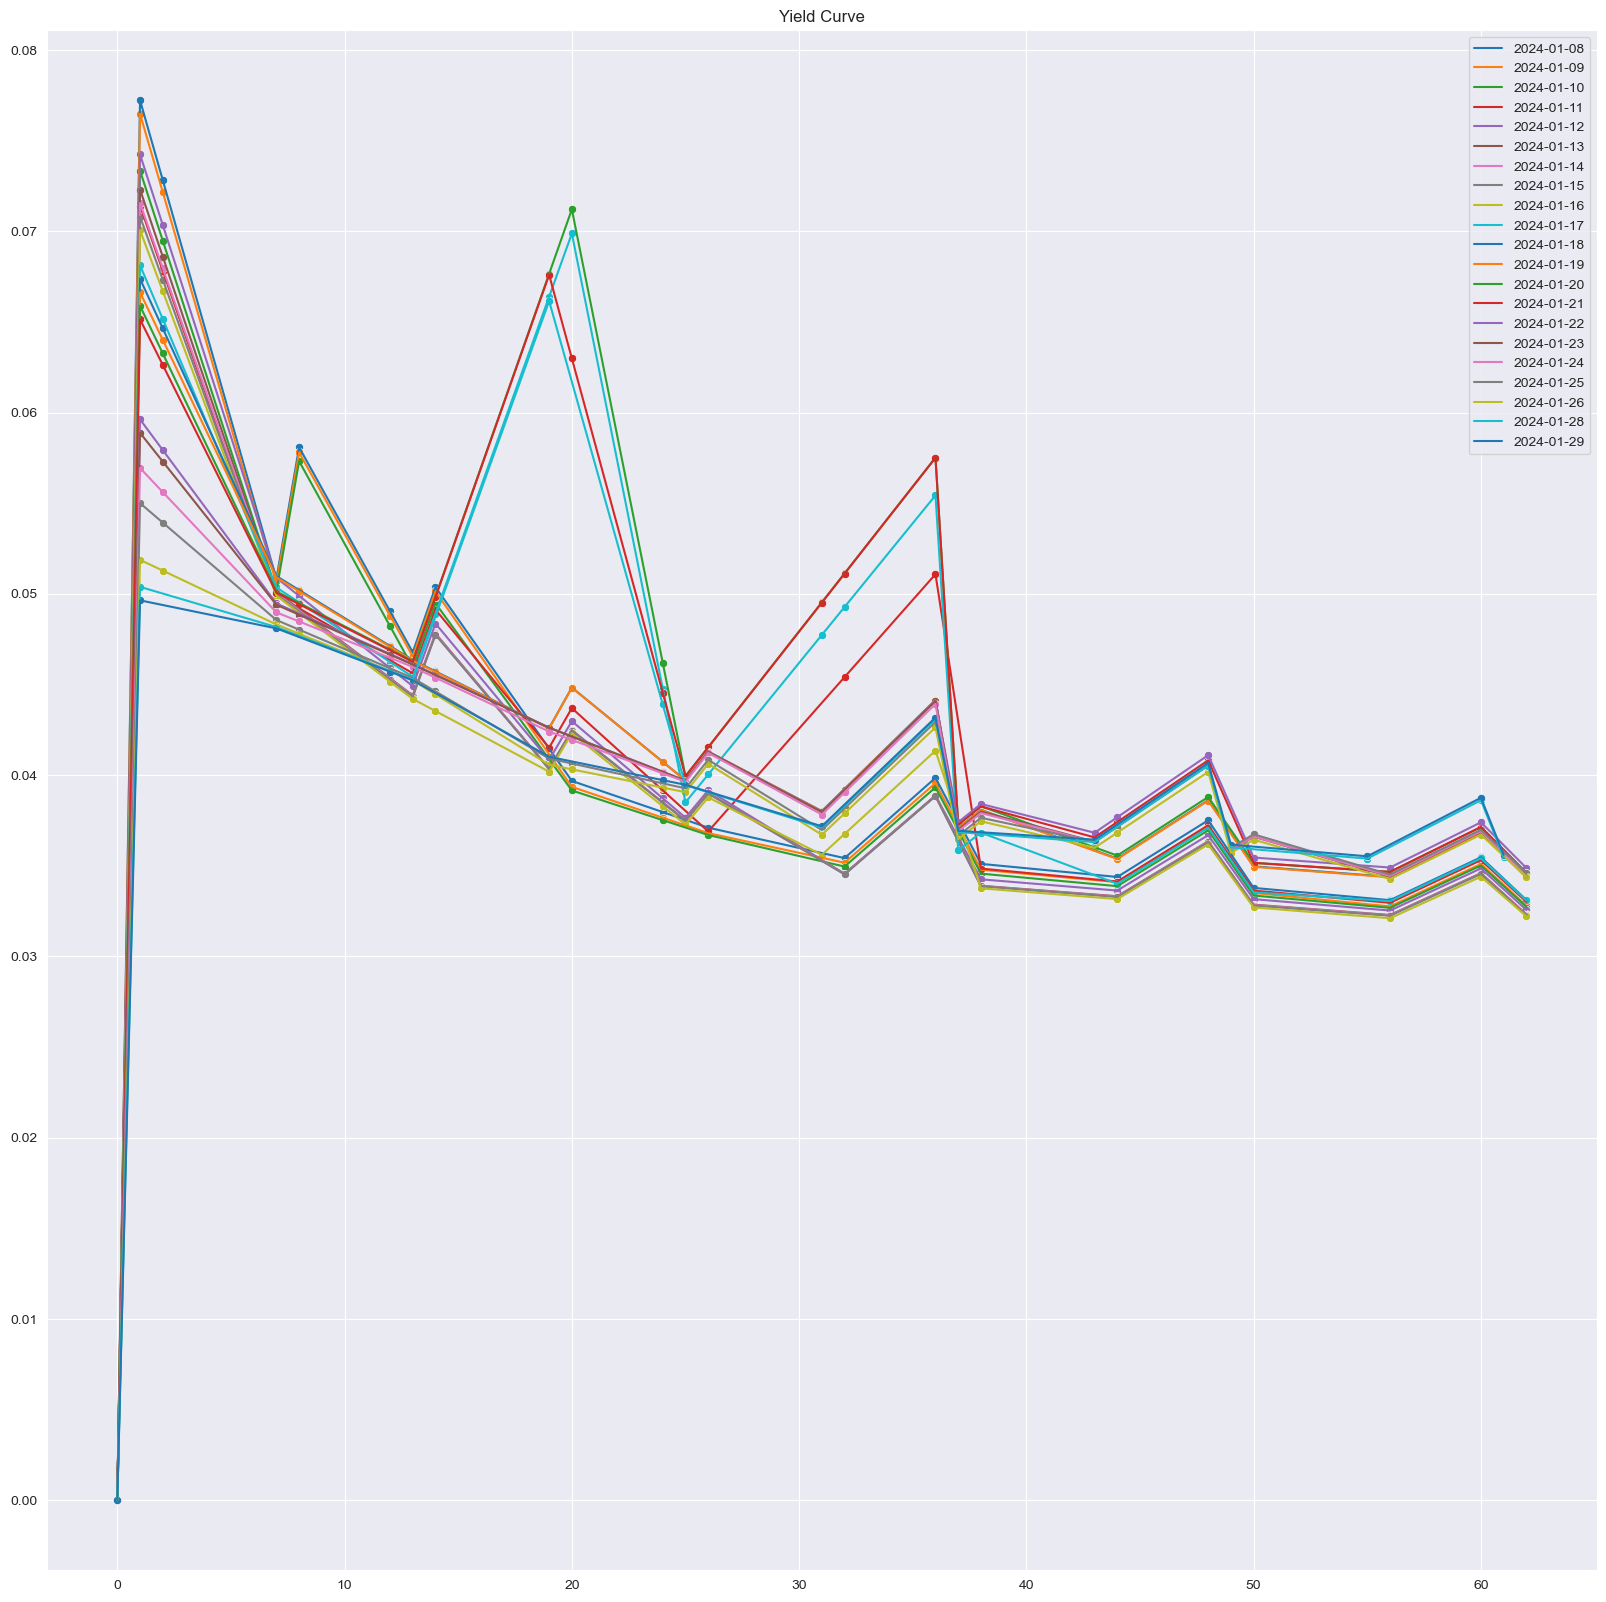

In [3]:
plt.figure(figsize=(20,20))
for date in data:
    _yields = data[date]._yield
    sns.scatterplot(x=_yields.keys(), y=_yields.values())
    sns.lineplot(x=_yields.keys(), y=_yields.values(), label=f"{pd.to_datetime(date, format='mixed').strftime('%Y-%m-%d')}")
plt.title("Yield Curve")
plt.plot()

In [4]:
list(data.values())[0].forward_rates

{(12, 24): 0.02688828325392502,
 (12, 36): 0.035259390483009356,
 (12, 48): 0.033667694890516825,
 (12, 60): 0.0320779719755827}

[]

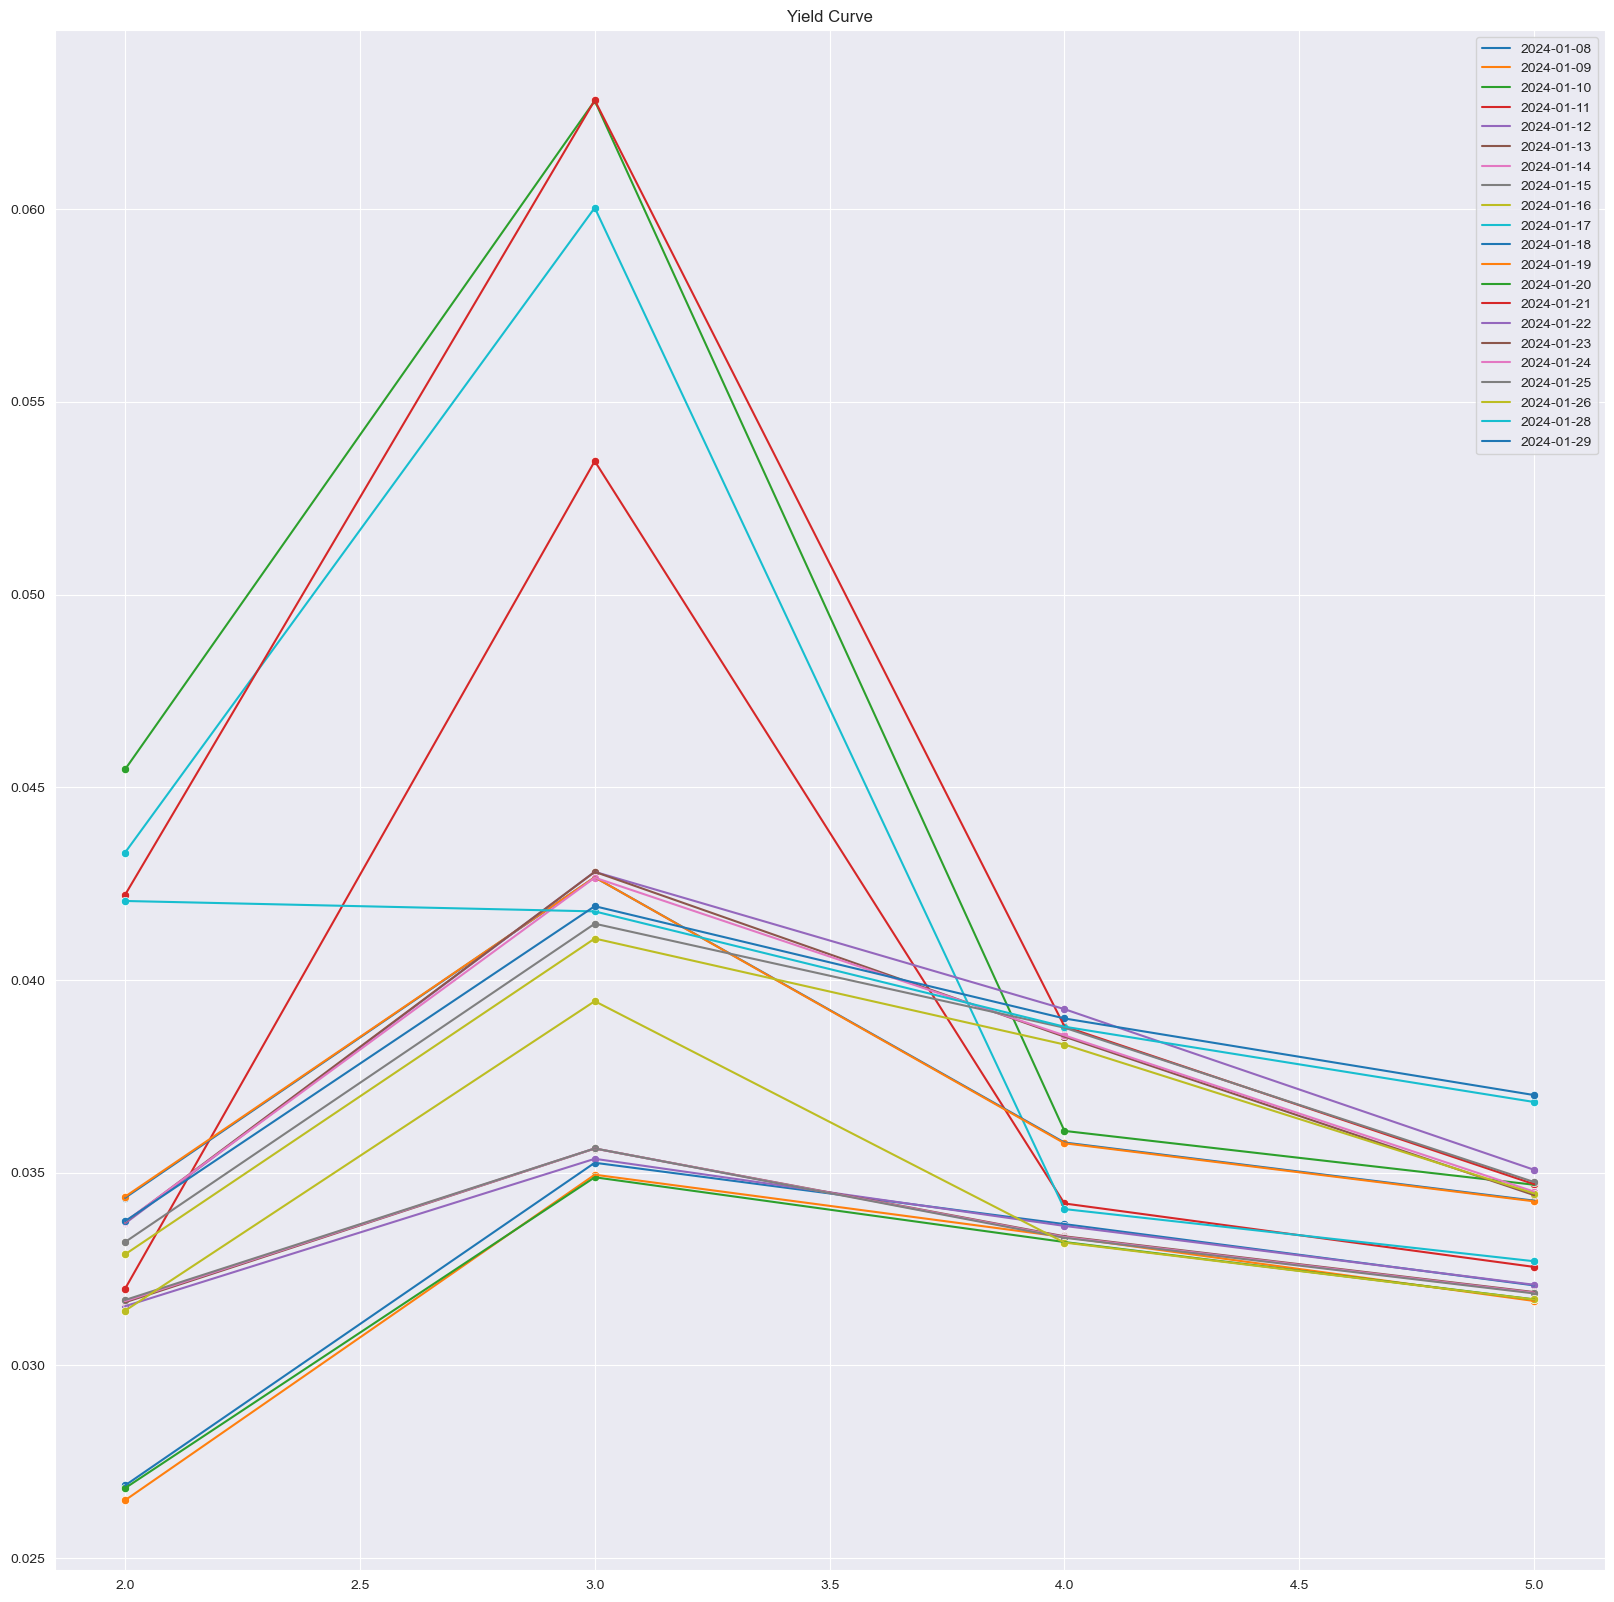

In [5]:
plt.figure(figsize=(20,20))
for date, bonds in data.items():
    x = []
    y = []
    for key, value in bonds.forward_rates.items():
        y.append(value)
        x.append(key[1]/12)
        if value < 0:
            print(date)
    sns.scatterplot(x=x, y=y)
    sns.lineplot(x=x, y=y, label=f"{pd.to_datetime(date, format='mixed').strftime('%Y-%m-%d')}")         
plt.title("Yield Curve")
plt.plot()